## Análisis - Serie A temporada 2015/2016 (masculina)

Vamos a hacer un análisis de las distintas competiciones (las cinco grandes ligas durante la temporada 2015-2016 y de todos los partidos en general) para poder entender que características son más importantes a la hora de tomar la decisión por parte del modelo de ML para decidir si el equipo va a ganar, perder o empatar el partido.

En este notebook en cuestión, vamos a analizar la Serie A en la temporada 2015/2016 (masculina).

Cargamos los datos de los partidos sobre la competición para entrenar el modelo y poder hacer el estudio de explicabilidad.

In [1]:
import os
import pandas as pd


competition_name = "Serie A"
competition_gender = "male"
season_name = "2015/2016"
season_name_for_filename = "2015_2016"

output_dir = "data/reduced/"
filename = f"{competition_name}({season_name_for_filename}_{competition_gender})_reduced.csv"
output_path = os.path.join(output_dir, filename)

if os.path.exists(output_path):
    print(f"Matches from the competition loaded from {output_path}")
    matches_in_SerieA = pd.read_csv(output_path)
else:
    print("You don't have data from the competition yet. Please run the notebook '0_datasets_building.ipynb' first.")

Matches from the competition loaded from data/reduced/Serie A(2015_2016_male)_reduced.csv


In [2]:
matches_in_SerieA.head(5)

,match_id,shots_on_target_ratio_home,shots_on_target_ratio_away,average_shots_on_target_distance_home,average_shots_on_target_distance_away,shots_inside_area_ratio_home,shots_inside_area_ratio_away,pass_success_ratio_home,pass_success_ratio_away,cross_success_ratio_home,...,percentage_shots_under_pressure_home,percentage_shots_inside_area_under_pressure_home,percentage_passes_under_pressure_home,percentage_passes_inside_area_under_pressure_home,percentage_set_piece_shots_home,percentage_set_piece_shots_inside_area_home,percentage_substitutions_home,percentage_tactical_substitutions_home,percentage_tactical_changes_home,percentage_formation_changes_home
0,3878548,0.285714,0.285714,16.182880,10.093019,0.619048,0.857143,0.795717,0.653614,0.407407,...,0.900000,0.888889,0.495238,0.750000,0.750000,0.642857,0.5,0.6,0.5,1.0
1,3878541,0.583333,0.285714,16.798535,18.598700,0.750000,0.523810,0.656667,0.851100,0.111111,...,0.500000,0.571429,0.478992,0.600000,0.315789,0.312500,0.5,0.4,0.5,0.5
2,3878549,0.250000,0.250000,17.663252,13.275137,0.687500,0.750000,0.792727,0.698824,0.214286,...,0.666667,0.800000,0.470588,0.333333,0.588235,0.500000,0.5,0.6,0.0,0.0
3,3878547,0.230769,0.230769,25.183344,15.573483,0.384615,0.538462,0.741514,0.785714,0.222222,...,0.285714,0.400000,0.564885,0.200000,0.280000,0.307692,0.5,0.5,1.0,1.0
4,3878546,0.352941,0.266667,14.242283,16.442821,0.705882,0.666667,0.707143,0.786885,0.214286,...,0.400000,0.444444,0.315476,0.333333,0.631579,0.666667,0.5,0.4,0.5,0.5


Una vez ya tenemos los datos cargados, entrenamos el mejor modelo (seleccionado tras la experimentación) y mostramos sus resultados.

In [3]:
from src.analysis import serieA_best_model


best_model_SerieA, evaluation_metrics, X_train_reduced_SerieA, X_test_reduced_SerieA, X_test_reduced_orig_SerieA, feature_names_reduced_SerieA, encoder_SerieA, match_ids_test = serieA_best_model(matches_in_SerieA)
print(f"The best model for La Liga is {best_model_SerieA}")
print(f"The evaluation metrics for the best model are:")
evaluation_metrics.head()

The best model for La Liga is LogisticRegression(C=0.9319903015590866, l1_ratio=0.3035119926400068,
                   max_iter=1000, penalty='elasticnet', random_state=42,
                   solver='saga')
The evaluation metrics for the best model are:


,Train Accuracy,Test Accuracy,Precision Macro,Precision Weighted,Recall Macro,Recall Weighted,F1 Macro,F1 Weighted
Logistic Regression MI,0.799342,0.618421,0.574374,0.611448,0.565664,0.618421,0.567402,0.612269


Una vez ya tenemos el mejor modelo entrenado comenzamos el análisis de explicabilidad.

### Estudio global

Vamos a comenzar por un estudio global. 

En este caso, al ser el mejor modelo Logistic Regression, vamos a fijarnos en el coeficiente (método coef_) que nos aporta el modelo para cada característica en cada clase. 
- Con esto, estamos observando la importancia global de cada característica para cada clase en términos de una relación lineal. Es decir, estamos observando relaciones exclusivamente lineales entre las características y la predicción.
- Con esto, no se tiene en cuenta las interacciones entre características ni tampoco explica predicciones individuales.

Los gráficos que se aparecen a continuación muestran la importancia de cada característica para predecir una determinada clase de resultado en los partidos de la Serie A. Las clases son:
- Clase "away_team": Indica qué características influyen en que el equipo visitante gane el partido.
- Clase "draw": Indica qué características influyen en que el partido termine en empate.
- Clase "home_team": Indica qué características influyen en que el equipo local gane el partido.

Los valores representados en el eje X son los coeficientes de la regresión logística, que indican la magnitud e impacto de cada variable en la probabilidad de un resultado específico. Valores positivos aumentan la probabilidad de que ocurra esa clase, mientras que valores negativos disminuyen dicha probabilidad.

Class 0: ['away_team']
Features with zero importance for class away_team:
['dribbles_success_ratio_away', 'last_3_matches_form_away', 'percentage_total_shots_home', 'percentage_shots_foot_home', 'percentage_total_passes_home', 'percentage_duels_won_home', 'percentage_yellow_cards_home', 'percentage_counterpress_home', 'percentage_players_off_home', 'percentage_set_piece_shots_home', 'percentage_tactical_substitutions_home']


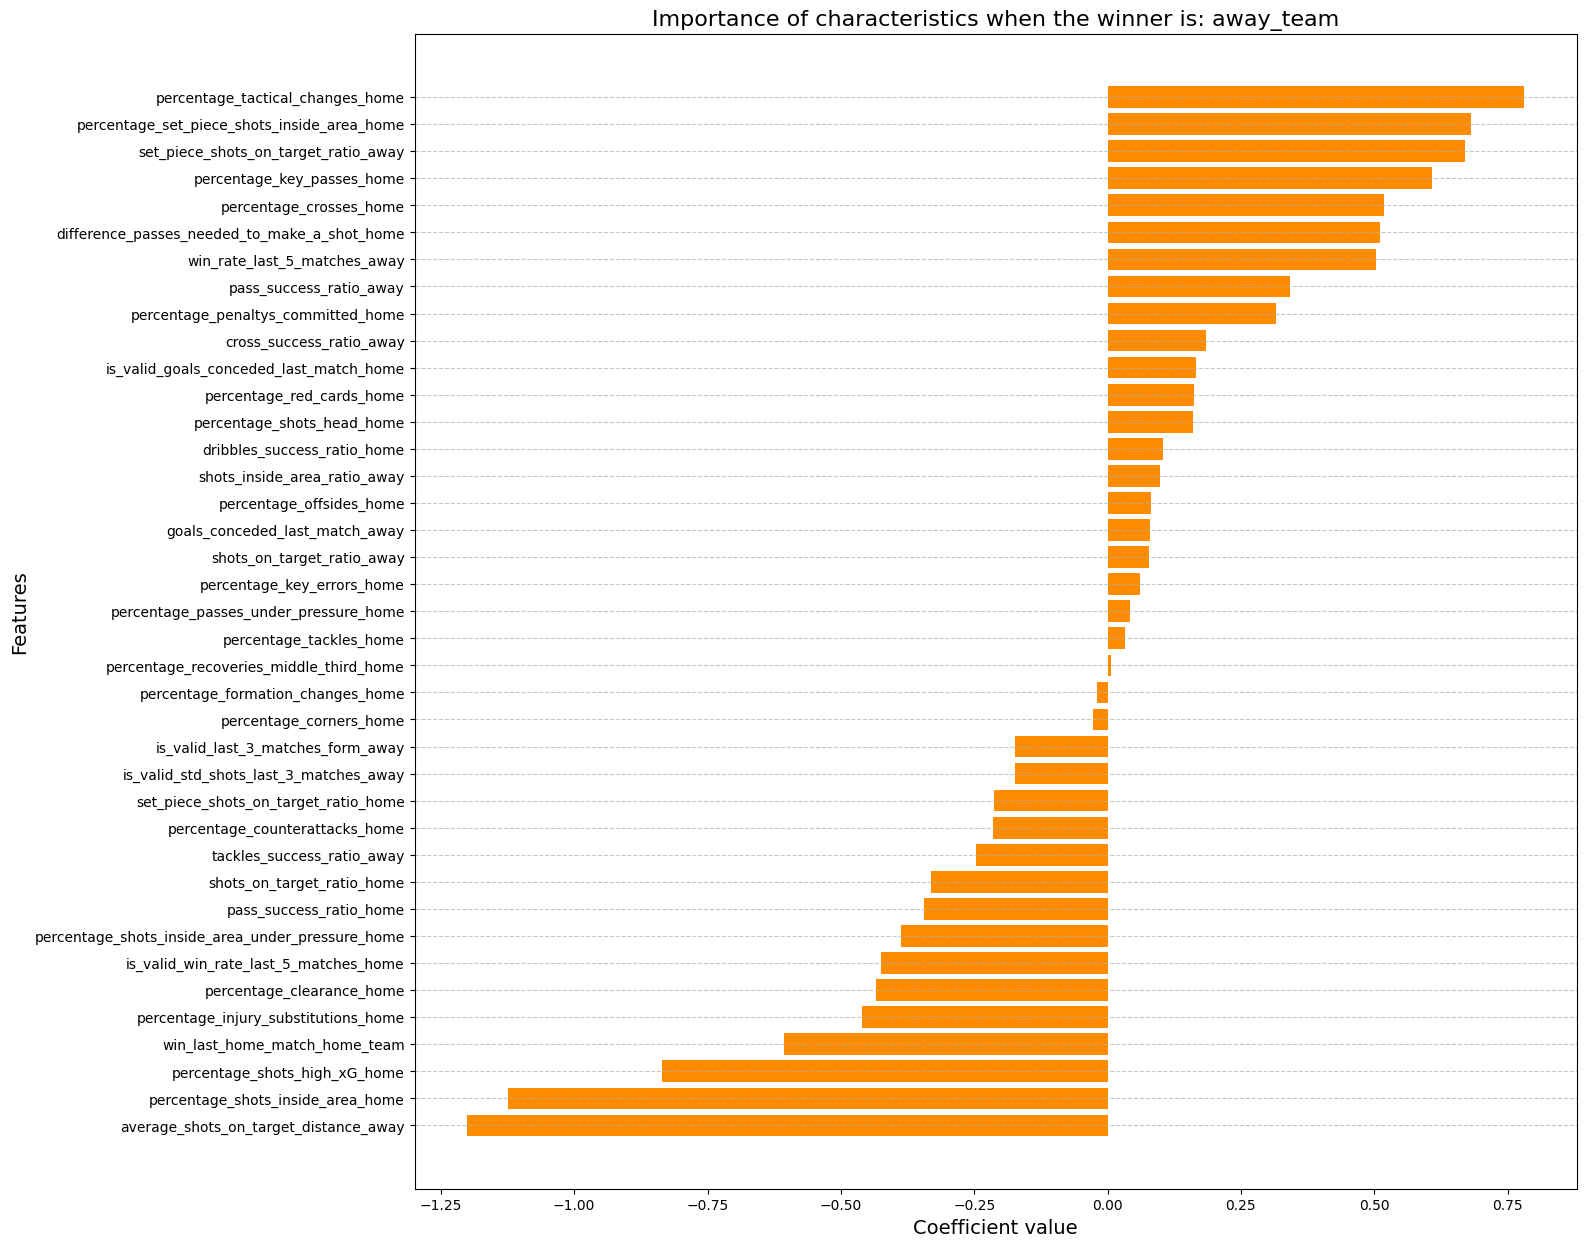

Class 1: ['draw']
Features with zero importance for class draw:
['shots_on_target_ratio_home', 'pass_success_ratio_home', 'set_piece_shots_on_target_ratio_home', 'is_valid_win_rate_last_5_matches_home', 'win_last_home_match_home_team', 'is_valid_goals_conceded_last_match_home', 'goals_conceded_last_match_away', 'percentage_total_shots_home', 'percentage_shots_high_xG_home', 'difference_passes_needed_to_make_a_shot_home', 'percentage_yellow_cards_home', 'percentage_counterpress_home', 'percentage_offsides_home', 'percentage_players_off_home', 'percentage_counterattacks_home', 'percentage_shots_inside_area_under_pressure_home', 'percentage_set_piece_shots_home']


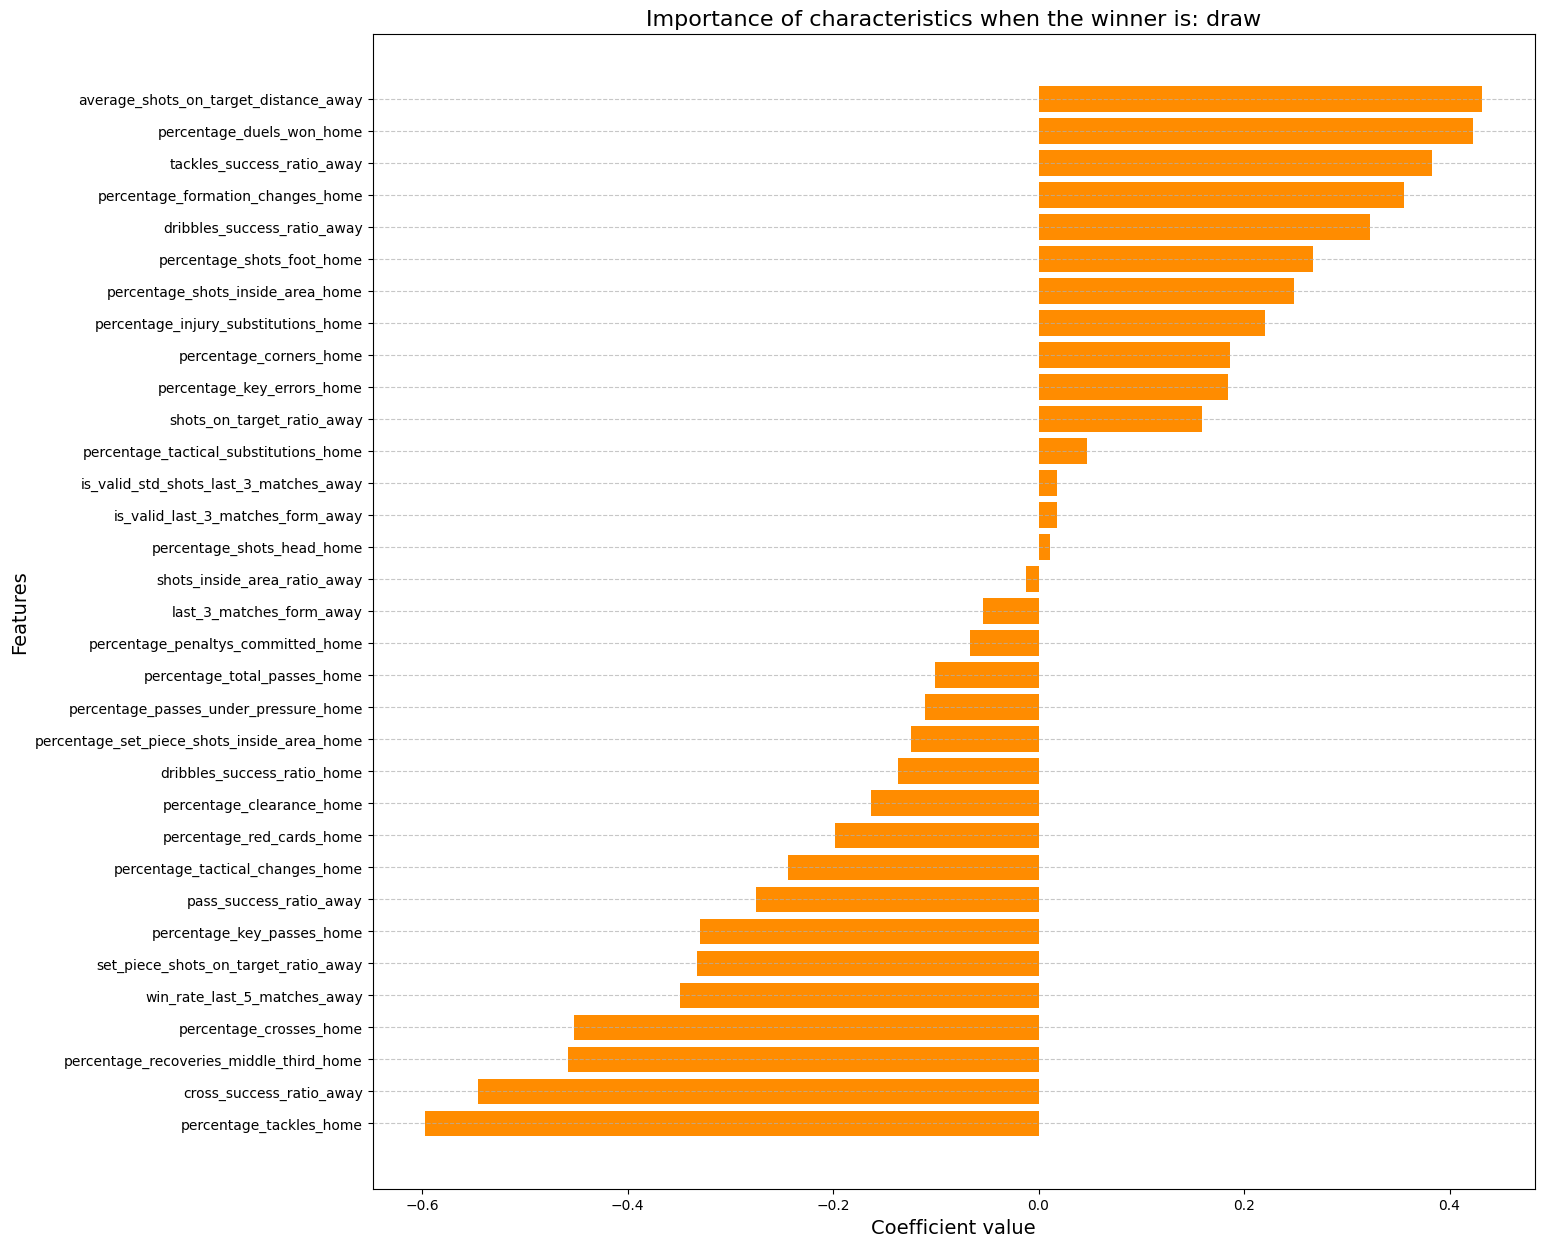

Class 2: ['home_team']
Features with zero importance for class home_team:
['shots_inside_area_ratio_away', 'pass_success_ratio_away', 'cross_success_ratio_away', 'tackles_success_ratio_away', 'dribbles_success_ratio_home', 'set_piece_shots_on_target_ratio_away', 'last_3_matches_form_away', 'is_valid_last_3_matches_form_away', 'win_rate_last_5_matches_away', 'is_valid_std_shots_last_3_matches_away', 'percentage_total_shots_home', 'percentage_key_passes_home', 'percentage_crosses_home', 'percentage_corners_home', 'percentage_penaltys_committed_home', 'percentage_red_cards_home', 'percentage_injury_substitutions_home', 'percentage_players_off_home', 'percentage_passes_under_pressure_home', 'percentage_formation_changes_home']


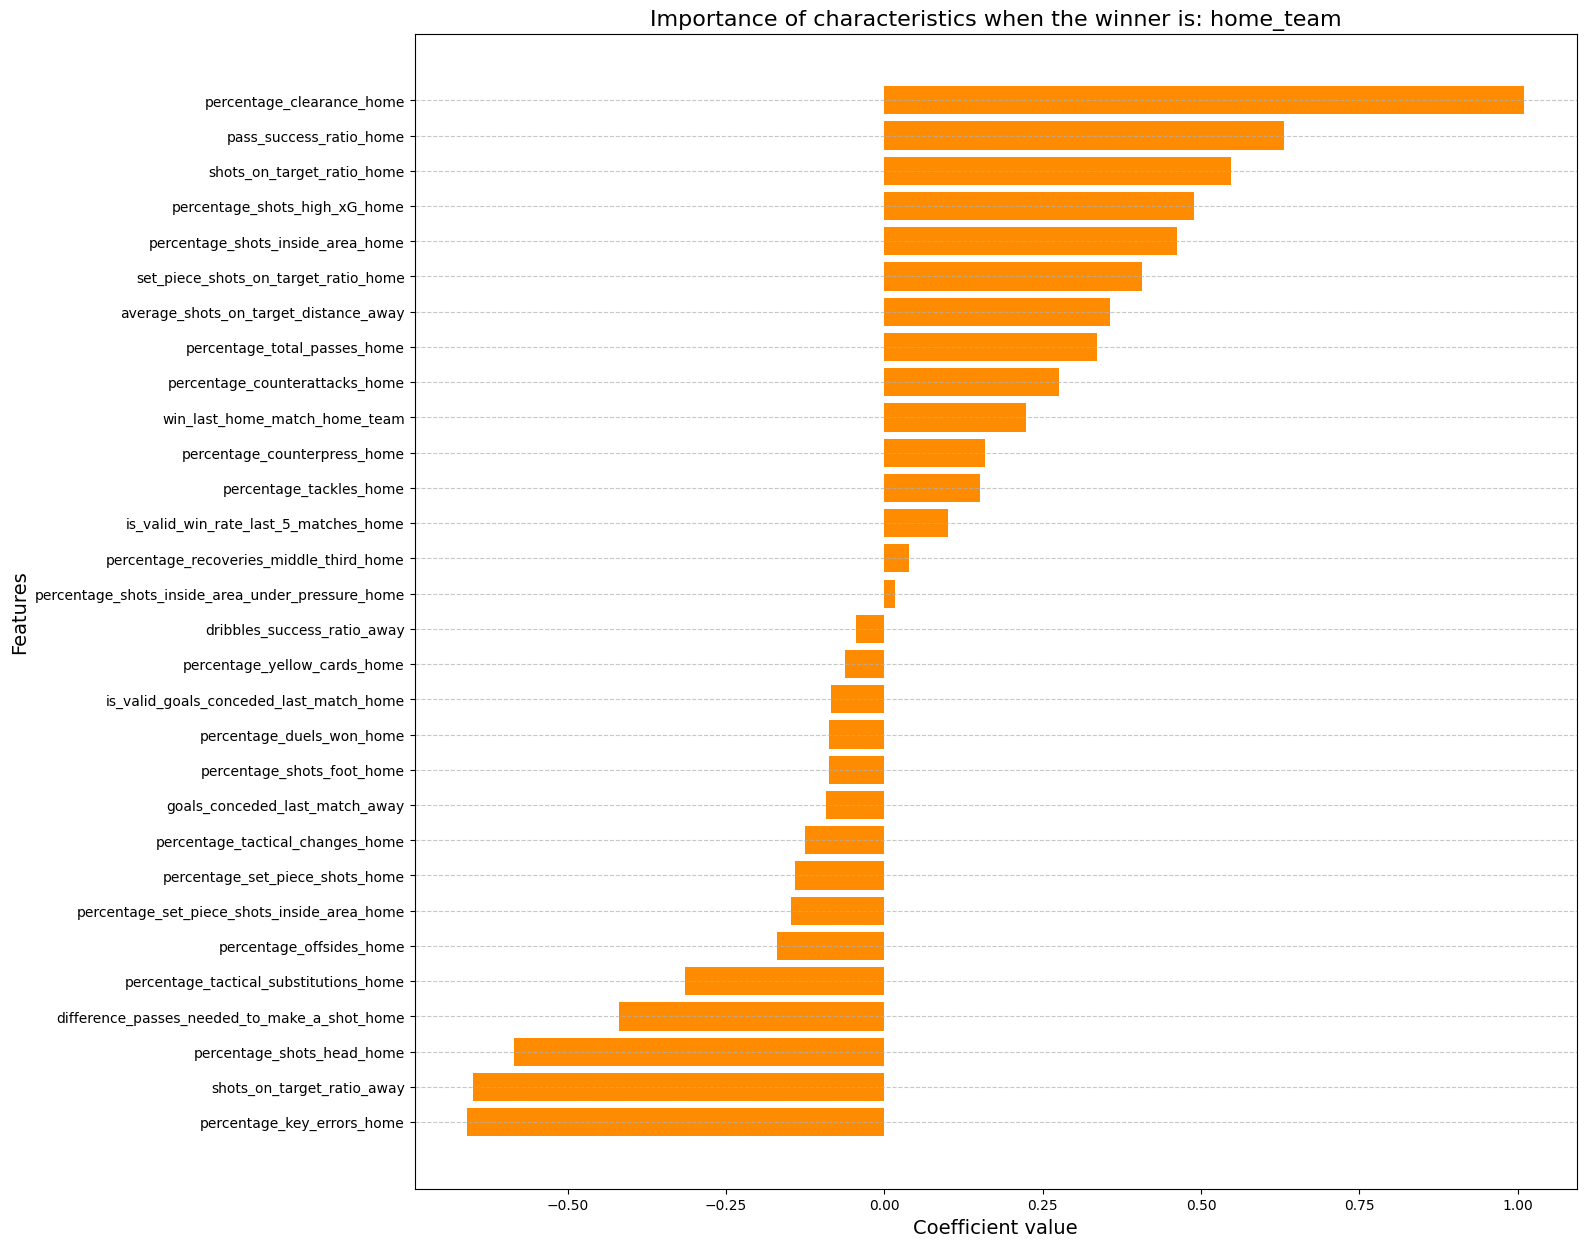

In [4]:
from src.analysis import logistic_regression_global_analysis

logistic_regression_global_analysis(best_model_SerieA, feature_names_reduced_SerieA, encoder_SerieA)

Vamos a analizar estos gráficos:

- **Importancia de características para la victoria del equipo visitante (*away_team*)**: Las características en este gráfico aumentan la probabilidad de que el equipo visitante gane el partido.
    - **Características que favorecen la victoria del equipo visitante**: 📈
        - `percentage_tactical_changes_home`: Un mayor número de cambios tácticos del equipo local sugiere inestabilidad en su planteamiento inicial, lo que favorece al visitante.
        - `percentage_set_piece_shots_inside_area_home`: Puede indicar que el equipo local depende de tiros dentro del área de jugadas a balón parado, lo que puede significar menor efectividad en ataque.
        - `set_piece_shots_on_target_ratio_away`: Si el equipo visitante tiene un alto porcentaje de tiros a puerta en jugadas a balón parado, incrementa su probabilidad de marcar.
        - `percentage_key_passes_home`: Un alto porcentaje de pases clave en el equipo local puede indicar que generan oportunidades, pero si no se concretan, podría reflejar inefectividad ofensiva.
        - `percentage_crosses_home`: Un alto número de centros del equipo local respecto al total del partido (ambos equipos) sugiere una dependencia del juego aéreo, lo que puede ser más predecible y menos efectivo contra una defensa bien organizada.
        - `difference_passes_needed_to_make_a_shot_home`: Si el equipo local necesita más pases para generar un disparo, su ataque es menos directo y puede ser menos eficiente.
        - `win_rate_last_5_matches_away`: Un equipo visitante con una buena racha en los últimos cinco partidos llega con confianza y ritmo competitivo, lo que incrementa su probabilidad de ganar.
        - `pass_success_ratio_away`: Un alto porcentaje de precisión en los pases del equipo visitante le permite mantener la posesión y controlar el ritmo del partido.
        - `percentage_penaltys_committed_home`: Un mayor número de penaltis cometidos por el equipo local puede significar oportunidades claras de gol para el visitante.
        - `cross_success_ratio_away`: Un alto porcentaje de centros exitosos por parte del equipo visitante les permite generar ocasiones de gol efectivas.
        - `percentage_red_cards_home`: Si el equipo local recibe más tarjetas rojas que el equipo visitante, juega en inferioridad numérica, lo que favorece al visitante.
        - `percentage_shots_head_home`: Un alto porcentaje de tiros de cabeza del equipo local puede indicar que su ataque depende excesivamente de centros y juego aéreo, lo que puede ser más predecible y menos efectivo.
        - `shots_inside_area_ratio_away`: Si un alto ratio de los tiros del equipo visitante es desde dentro del área tienen más opciones de llevarse el partido.
        - `shots_on_target_ratio_away`: Si un alto ratio de los tiros del equipo visitante van a puerta tienen más opciones de llevarse el partido.
        - `percentage_key_errors_home`: Un equipo local con un mayor número de errores graves que el visitante, da más facilidades de llevarse el partido al equipo visitante.
        - `percentage_passes_under_pressure_home`: Un equipo local que realiza más pases bajo presión que el equipo visitante hace que aumenten las opciones de ganar el partido por parte del equipo visitante.
    - **Características que no favorecen la victoria del equipo visitante**: 📉
        - `average_shots_on_target_distance_away`: Si el equipo visitante realiza tiros a puerta desde largas distancias, sus oportunidades de marcar disminuyen, ya que estos disparos suelen ser menos peligrosos.
        - `percentage_shots_inside_area_home`: Si el equipo local consigue realizar más tiros dentro del área, sus oportunidades de marcar aumentan, reduciendo la posibilidad de victoria visitante.
        - `percentage_shots_high_xG_home`: Si el equipo local genera tiros con una alta expectativa de gol (xG), es más probable que convierta sus oportunidades.
        - `win_last_home_match_home_team`: Si el equipo local ganó su último partido en casa, es probable que llegue con confianza y con un buen rendimiento reciente. Además de que puede deberse a que es un equipo que concede pocas opciones de ganar a los rivales en casa.
        - `percentage_clearance_home`: Si el equipo local realiza muchos despejes efectivos, su defensa puede estar resolviendo bien las amenazas del visitante.
        - `shots_on_target_ratio_home`: Un equipo local con un alto porcentaje de tiros a puerta genera más peligro y dificulta la victoria del visitante.
        - `pass_sucess_ratio_home`: Un alto ratio de pases acertados por parte del equipo local hace que aumenten sus opciones de ganar el partido.
        - `percentage_counterattacks_home`: Un mayor número de contraataques por parte del equipo local respecto al visitante hace que disminuyan las opciones de ganar el partido por parte del equipo visitante.
    - **Características que no tienen importancia en la victoria del equipo visitante**:
        - `percentage_yellow_cards_home`: El número de tarjetas amarillas del equipo local respecto al total del partido (ambos equipos) no parece influir en la victoria del equipo visitante.
        - `percentage_total_shots_home`, `percentage_shots_foot_home`: El número de tiros y tiros con el pie del equipo local respecto al total del partido (ambos equipos) no parece influir en la victoria del equipo visitante.
        - `percentage_duels_won_home`: El número de duelos ganados del equipo local respecto al total del partido (ambos equipos) no parece influir en la victoria del equipo visitante.
        - `percentage_tackles_home`: El número de entradas del equipo local respecto al total del partido (ambos equipos) no parece influir en la victoria del equipo visitante.
    - **Conclusión**: Para que un equipo visitante tenga mayores probabilidades de ganar un partido en la Serie A, es fundamental que aproveche errores tácticos y defensivos del equipo local, como un alto número de cambios estratégicos, pases bajo presión y errores clave en la circulación del balón. Además, factores como una alta efectividad en tiros a puerta y dentro del área, un buen desempeño en jugadas a balón parado y un alto porcentaje de precisión en los pases permiten al visitante controlar el ritmo del partido y generar oportunidades de gol. También, si el equipo local depende excesivamente del juego aéreo o de centros al área, su ataque puede volverse predecible, lo que favorece a un visitante con una defensa bien organizada. Sin embargo, hay factores que pueden dificultar la victoria del equipo visitante, como un equipo local que realiza más tiros dentro del área con un alto valor de xG, un elevado porcentaje de pases exitosos y una defensa sólida que realiza despejes efectivos. Además, si el equipo local ganó su último partido en casa, es posible que tenga confianza y sea difícil de vencer en su estadio. Por otro lado, métricas como el número de tarjetas amarillas, la cantidad total de tiros y ciertos duelos defensivos del equipo local no parecen tener un impacto determinante en la victoria del equipo visitante.

- **Importancia de características para el empate (*draw*)**: El empate en un partido suele estar influenciado por un equilibrio en las métricas de ataque y defensa de ambos equipos. Algunas observaciones clave:
    - **Características que favorecen el empate**: 📈
        - `average_shots_on_target_distance_away`: Si el equipo visitante realiza tiros a puerta desde largas distancias, sus oportunidades de marcar disminuyen, favoreciendo un resultado más ajustado.
        - `percentage_duels_won_home`: Un equipo local que gana una gran cantidad de duelos hace que el partido sea más disputado, reduciendo la posibilidad de que un equipo imponga su dominio.
        - `tackles_success_ratio_away`: Un alto porcentaje de entradas exitosas del equipo visitante sugiere un partido con menos transiciones rápidas y menos ocasiones de gol.
        - `percentage_formation_changes_home`: Un mayor número de cambios tácticos en el equipo local indica que el partido es dinámico y ajustado, lo que favorece un empate.
        - `dribbles_success_ratio_away`: Un equipo visitante con un alto porcentaje de regates exitosos puede mantener la posesión y evitar que el equipo local imponga su ritmo.
        - `percentage_shots_foot_home`: Un mayor porcentaje de tiros con el pie del equipo local sugiere una tendencia a buscar opciones de disparo sin llegar a concretar una diferencia en el marcador.
        - `percentage_shots_inside_area_home`: Si el equipo local realiza más tiros dentro del área pero no logra convertir en goles, el partido puede terminar en empate.
        - `percentage_injury_substitutions_home`: Si el equipo local realiza sustituciones por lesión, podría afectar su rendimiento sin que esto derive en un resultado favorable para alguno de los equipos.
        - `percentage_corners_home`: Un mayor número de córners del equipo local puede indicar presión ofensiva, pero sin necesariamente traducirse en goles que rompan el empate.
        - `percentage_key_errors_home`: Si el equipo local comete errores clave pero el visitante no logra aprovecharlos, el marcador se mantiene igualado.
        - `shots_on_target_ratio_away`: Un equipo visitante con un porcentaje de tiros a puerta moderado pero sin concretar los goles suficientes para ganar favorece el empate.
        - `percentage_tactical_substitutions_home`: Un equipo local que realiza cambios tácticos puede estar buscando equilibrar el partido, lo que favorece el empate.
        - `percentage_shots_head_home`: Un alto porcentaje de tiros de cabeza del equipo local puede indicar que su ataque depende excesivamente de centros y juego aéreo, lo que hace que el marcador se mantenga igualado.
    - **Características que no favorecen el empate**: 📉
        - `percentage_tackles_home`: Un equipo local que realiza muchas entradas puede estar tratando de recuperar la posesión y controlar el partido, disminuyendo las posibilidades de empate.
        - `cross_success_ratio_away`: Un alto porcentaje de centros exitosos del equipo visitante sugiere que están generando oportunidades claras, aumentando sus posibilidades de victoria.
        - `percentage_recoveries_middle_third_home`: Un alto número de recuperaciones en el medio campo del equipo local indica que están dominando la zona central y reduciendo las opciones del visitante.
        - `percentage_crosses_home`: Un alto número de centros del equipo local respecto al total del partido (ambos equipos) sugiere una dependencia del juego aéreo, lo que puede ser más predecible y menos efectivo contra una defensa bien organizada.
        - `percentage_tactical_changes_home`: Un mayor número de cambios tácticos del equipo local sugiere inestabilidad en su planteamiento inicial, lo que favorece al visitante.
        - `percentage_red_cards_home`: Si el equipo local recibe tarjetas rojas, el visitante tiene una mayor probabilidad de aprovechar la superioridad numérica y llevarse la victoria.
        - `dribbles_success_ratio_home`: Un equipo local con un alto porcentaje de regates exitosos puede estar generando más oportunidades, reduciendo la posibilidad de un empate.
        - `percentage_clearance_home`: Un alto número de despejes del equipo local puede significar que están defendiendo con intensidad y buscando mantener una ventaja.
        - `percentage_passes_under_pressure_home`: Un equipo local que juega bajo presión puede cometer errores que favorezcan al equipo visitante y rompan el empate.
        - `percentage_total_passes_home`: Un mayor número de pases del equipo local puede significar que están dominando el juego y reduciendo las oportunidades del rival.
        - `percentage_penaltys_committed_home`: Si el equipo local comete penaltis, el visitante tiene oportunidades claras de anotar y romper el empate.
        - `win_rate_last_5_matches_away`, `last_3_matches_form_away`: Si el equipo visitante llega en buena forma en los últimos partidos, es más probable que logre una victoria.
        - `shots_inside_area_ratio_away`: Si el equipo visitante tiene un alto porcentaje de tiros dentro del área, sus oportunidades de marcar aumentan, reduciendo la posibilidad de un empate.
    - **Características que no tienen importancia en el empate**:
       - `shots_on_target_ratio_home`, `set_piece_shots_on_target_ratio_home`, `percentage_total_shots_home`, `percentage_shots_high_xG_home`, `percentage_set_piece_shots_home`: algunas métricas acerca de los disparos no parecen influir en el empate.
       - `win_last_home_match_home_team`, `goals_conceded_last_match_away`: algunas métricas temporales no parecen influir en el empate
       - `difference_passes_needed_to_make_a_shot_home`, `percentage_counterpress_home`, `percentage_counterattacks_home`: algunas métricas que reflejan el estilo de juego de los equipos no parecen influir en el empate.
       - `percentage_yellow_cards_home`: El número de tarjetas amarillas del equipo local respecto al total del partido (ambos equipos) no parece influir en el empate.
    - **Conclusión**: El empate en un partido suele ser el resultado de un equilibrio entre las métricas ofensivas y defensivas de ambos equipos, donde ninguno logra imponer una clara superioridad. Factores que favorecen el empate incluyen tiros lejanos del equipo visitante, lo que reduce la efectividad ofensiva, y un alto número de duelos ganados por el equipo local, lo que indica un partido disputado y trabado. Además, la alta cantidad de regates exitosos del visitante, combinada con cambios tácticos del equipo local, sugiere un encuentro dinámico sin un claro dominador. También, la falta de eficacia en tiros dentro del área por parte del equipo local, sumado a errores clave que el visitante no logra aprovechar, contribuye a mantener el marcador equilibrado. Sin embargo, el empate se vuelve menos probable si el equipo local domina el centro del campo con recuperaciones efectivas o si el visitante genera oportunidades claras a través de centros exitosos y tiros dentro del área. Asimismo, factores como la cantidad de pases totales del equipo local, el número de penaltis cometidos o la buena forma reciente del equipo visitante pueden inclinar la balanza hacia un ganador. Por otro lado, métricas como las tarjetas amarillas, ciertos estilos de juego y algunas estadísticas de disparos no parecen ser determinantes para el empate.

- **Importancia de características para la victoria del equipo local (*home_team*)**: Las características en este gráfico aumentan la probabilidad de que el equipo local gane el partido.
    - **Características que favorecen la victoria del equipo local**: 📈
        - `percentage_clearance_home`: Un alto porcentaje de despejes exitosos del equipo local indica una defensa sólida, reduciendo las oportunidades de gol del rival.
        - `pass_success_ratio_home`: Un equipo local con una alta precisión en los pases puede controlar mejor el ritmo del partido y generar más oportunidades.
        - `shots_on_target_ratio_home`: Un mayor porcentaje de tiros a puerta del equipo local incrementa su probabilidad de marcar y ganar el partido.
        - `percentage_shots_high_xG_home`: Si el equipo local genera más tiros con una alta expectativa de gol (xG), es más probable que convierta sus oportunidades.
        - `percentage_shots_inside_area_home`: Un equipo local que realiza un alto porcentaje de tiros dentro del área suele generar más peligro y aumentar su probabilidad de anotar.
        - `set_piece_shots_on_target_ratio_home`: Si el equipo local tiene una alta efectividad en tiros a puerta desde jugadas a balón parado, incrementa sus opciones de victoria.
        - `average_shots_on_target_distance_away`: Si el equipo visitante realiza tiros desde una mayor distancia, su efectividad de cara al gol disminuye, favoreciendo la victoria local.
        - `percentage_total_passes_home`: Un equipo local con un alto número de pases puede estar dominando la posesión y el ritmo del partido, lo que le da más control.
        - `percentage_counterattacks_home`: Un equipo local que genera más contraataques puede aprovechar los espacios dejados por el rival y aumentar sus posibilidades de marcar.
        - `win_last_home_match_home_team`: Si el equipo local ganó su último partido en casa, es probable que llegue con confianza y mantenga un buen rendimiento en su estadio.
        - `percentage_counterpress_home`: Un equipo local que ejerce presión tras la pérdida del balón puede dificultar la salida del rival y recuperar la posesión rápidamente.
        - `percentage_tackles_home`: Un equipo local que realiza una gran cantidad de entradas puede estar demostrando agresividad defensiva, evitando que el equipo visitante desarrolle su juego.
        - `percentage_recoveries_middle_third_home`: Un equipo local que recupera el balón en el tercio medio del campo puede cortar los ataques del rival y mantener el control del partido.
    - **Características que no favorecen la victoria del equipo local**: 📉
        - `percentage_key_errors_home`: Si el equipo local comete errores clave en el partido, puede facilitar oportunidades al equipo visitante y reducir sus opciones de victoria.
        - `shots_on_target_ratio_away`: Un equipo visitante con un alto porcentaje de tiros a puerta genera más peligro, lo que dificulta la victoria del equipo local.
        - `percentage_shots_head_home`: Un alto porcentaje de tiros de cabeza del equipo local puede indicar que su ataque depende excesivamente del juego aéreo, lo que podría ser menos efectivo.
        - `difference_passes_needed_to_make_a_shot_home`: Si el equipo local necesita más pases para generar un disparo, su ataque es menos eficiente y más predecible.
        - `percentage_tactical_substitutions_home`: Un alto número de sustituciones tácticas del equipo local podría indicar que están intentando corregir problemas en su estrategia, lo que podría reflejar dificultades en el partido.
        - `percentage_offsides_home`: Si el equipo local cae en fuera de juego con frecuencia, puede estar teniendo dificultades para romper la defensa rival de manera efectiva.
        - `percentage_set_piece_shots_inside_area_home`: Si el equipo local genera muchos tiros en jugadas a balón parado dentro del área pero no es efectivo, puede desperdiciar oportunidades clave.
        - `percentage_set_piece_shots_home`: Si el equipo local depende demasiado de los tiros a balón parado, podría tener dificultades para generar ocasiones en jugadas de campo abierto.
        - `percentage_tactical_changes_home`: Un alto número de cambios tácticos en el equipo local puede reflejar inestabilidad en su planteamiento y afectar su rendimiento.
        - `goals_conceded_last_match_away`: Si el equipo visitante concedió pocos goles en su último partido, puede significar que tiene una defensa sólida, lo que dificulta la victoria local.
        - `percentage_shots_foot_home`: Un mayor porcentaje de tiros con el pie del equipo local no parece estar directamente relacionado con una mayor efectividad en la victoria.
        - `percentage_duels_won_home`: Un equipo local que gana más duelos individuales no garantiza que traduzca esta ventaja en una victoria.
        - `percentage_yellow_cards_home`: Un mayor número de tarjetas amarillas para el equipo local parece hacer disminuir la probabilidad de victoria del equipo local.
    - **Características que no tienen importancia en la victoria del equipo local**:
        - `shots_inside_area_ratio_away`, `pass_success_ratio_away`, `cross_success_ratio_away`, `tackles_success_ratio_away`, `set_piece_shots_on_target_ratio_away`: Métricas relacionadas con el desempeño del equipo visitante que no parecen influir en la victoria local.
        - `dribbles_success_ratio_home`, `percentage_key_passes_home`: Indicadores ofensivos del equipo local que no muestran una correlación clara con su victoria.
        - `percentage_corners_home`, `percentage_penaltys_committed_home`, `percentage_red_cards_home`, `percentage_injury_substitutions_home`: Factores de juego y disciplina que no parecen influir en el resultado final.
        - `percentage_players_off_home`, `percentage_passes_under_pressure_home`, `percentage_formation_changes_home`: Métricas de juego que no muestran un impacto claro en la victoria del equipo local.
        - `win_rate_last_5_matches_away`, `last_3_matches_form_away`: La forma reciente del equipo visitante no parece ser determinante en la victoria del equipo local.
    - **Conclusión**: La victoria del equipo local en la Serie A está fuertemente influenciada por su solidez defensiva, precisión en los pases y capacidad para generar y concretar oportunidades de alta calidad en ataque. Un equipo local con un alto porcentaje de despejes efectivos, buena precisión en los pases y dominio de la posesión tiene mayores probabilidades de controlar el ritmo del partido y limitar las oportunidades del equipo visitante. Además, un alto porcentaje de tiros a puerta y disparos dentro del área con alta expectativa de gol (xG) favorecen el éxito ofensivo del equipo local. Estrategias como el contraataque efectivo y la presión tras pérdida también juegan un papel clave en mantener la iniciativa y forzar errores del rival. Sin embargo, la victoria del equipo local se ve comprometida si comete errores clave, si el equipo visitante tiene una alta precisión en los tiros a puerta o si el equipo local depende en exceso del juego aéreo sin ser efectivo. Asimismo, factores como las sustituciones tácticas frecuentes, los fueras de juego y la inestabilidad táctica pueden indicar problemas en el planteamiento del partido, reduciendo las probabilidades de victoria. Por otro lado, métricas como la forma reciente del equipo visitante, la cantidad de tarjetas rojas y ciertos aspectos del juego no parecen tener un impacto determinante en el resultado.

- **Conclusiones generales**: 
    - *Victoria del equipo visitante*: Para que un equipo visitante tenga más probabilidades de ganar, es crucial que aproveche los errores tácticos y defensivos del equipo local, como cambios frecuentes en la estrategia, pases bajo presión y errores clave en la circulación del balón. Además, un alto porcentaje de tiros a puerta y dentro del área, una buena efectividad en jugadas a balón parado y una alta precisión en los pases favorecen su dominio del juego.
    También se beneficia cuando el equipo local depende excesivamente del juego aéreo y los centros, lo que puede ser más predecible y fácil de defender. Sin embargo, la victoria visitante se vuelve más difícil si el equipo local tiene una defensa sólida, realiza despejes efectivos y genera tiros de alta calidad con un alto xG.
    - *Empate*: El empate suele darse en partidos equilibrados, donde ningún equipo logra imponerse con claridad. Un alto número de duelos ganados, regates exitosos y cambios tácticos del equipo local y visitante indican un partido disputado y dinámico. Además, si el equipo visitante realiza tiros lejanos, su efectividad disminuye, favoreciendo un marcador igualado. 
    El empate se vuelve menos probable si uno de los equipos domina el centro del campo con recuperaciones efectivas, genera oportunidades claras mediante centros precisos o concreta sus tiros dentro del área. Factores como la cantidad de pases, los penaltis cometidos y la buena forma reciente de un equipo pueden inclinar la balanza hacia un ganador.
    - *Victoria del equipo local*: El equipo local tiene más probabilidades de ganar cuando mantiene una defensa sólida, domina la posesión y genera oportunidades de gol de alta calidad. Factores clave incluyen un alto porcentaje de despejes efectivos, precisión en los pases y tiros dentro del área con un alto xG. Además, la presión tras pérdida y la capacidad de generar contraataques contribuyen a su éxito.
    Por otro lado, la victoria local se complica si comete errores clave, permite tiros precisos del equipo visitante o no concreta sus oportunidades ofensivas. Dependencia excesiva del juego aéreo, sustituciones tácticas frecuentes y caídas en fuera de juego pueden reflejar problemas en su planteamiento.
    - *Factores no determinantes*: Algunas métricas no parecen influir significativamente en los resultados de los partidos. Entre ellas se encuentran la cantidad de tarjetas amarillas, el número total de tiros y duelos defensivos del equipo local, así como la forma reciente del equipo visitante. Además, ciertas estadísticas de posesión y pases bajo presión tampoco muestran una correlación clara con el resultado final.

### Estudio local

Ahora comenzamos el análisis de explicabilidad utilizando SHAP. 

El análisis SHAP (SHapley Additive exPlanations) nos permite interpretar el impacto de cada característica en la predicción del modelo. A diferencia de los coeficientes lineales, SHAP captura interacciones entre variables y muestra el impacto individual de cada una en cada predicción. En este documento analizaremos los resultados obtenidos para la predicción de los partidos de la Serie A.

Cada uno de los siguientes gráficos representa la importancia de las variables en la predicción de cada posible resultado:
- Victoria del equipo visitante (away_team).
- Empate (draw).
- Victoria del equipo local (home_team).

**Interpretación de los gráficos SHAP**: Cada punto en el gráfico representa un partido. Los valores en el eje X indican el impacto de una característica específica en la predicción del modelo:
- Valores positivos: Incrementan la probabilidad de que el partido termine con el resultado indicado.
- Valores negativos: Disminuyen la probabilidad del resultado.
- Color: Representa el valor de la característica. Rojo indica valores altos y azul valores bajos.

In [5]:
from src.analysis import compute_shap_values

shap_values_SerieA = compute_shap_values(best_model_SerieA, X_train_reduced_SerieA, X_test_reduced_SerieA, feature_names_reduced_SerieA)

Class 0: away_team
Important features (44):
['shots_on_target_ratio_home', 'shots_on_target_ratio_away', 'average_shots_on_target_distance_away', 'shots_inside_area_ratio_away', 'pass_success_ratio_home', 'pass_success_ratio_away', 'cross_success_ratio_away', 'tackles_success_ratio_away', 'dribbles_success_ratio_home', 'dribbles_success_ratio_away', 'set_piece_shots_on_target_ratio_home', 'set_piece_shots_on_target_ratio_away', 'is_valid_last_3_matches_form_away', 'is_valid_win_rate_last_5_matches_home', 'win_rate_last_5_matches_away', 'win_last_home_match_home_team', 'is_valid_goals_conceded_last_match_home', 'goals_conceded_last_match_away', 'is_valid_std_shots_last_3_matches_away', 'percentage_shots_high_xG_home', 'percentage_shots_inside_area_home', 'percentage_shots_foot_home', 'percentage_shots_head_home', 'percentage_total_passes_home', 'percentage_key_passes_home', 'difference_passes_needed_to_make_a_shot_home', 'percentage_crosses_home', 'percentage_corners_home', 'percentage_

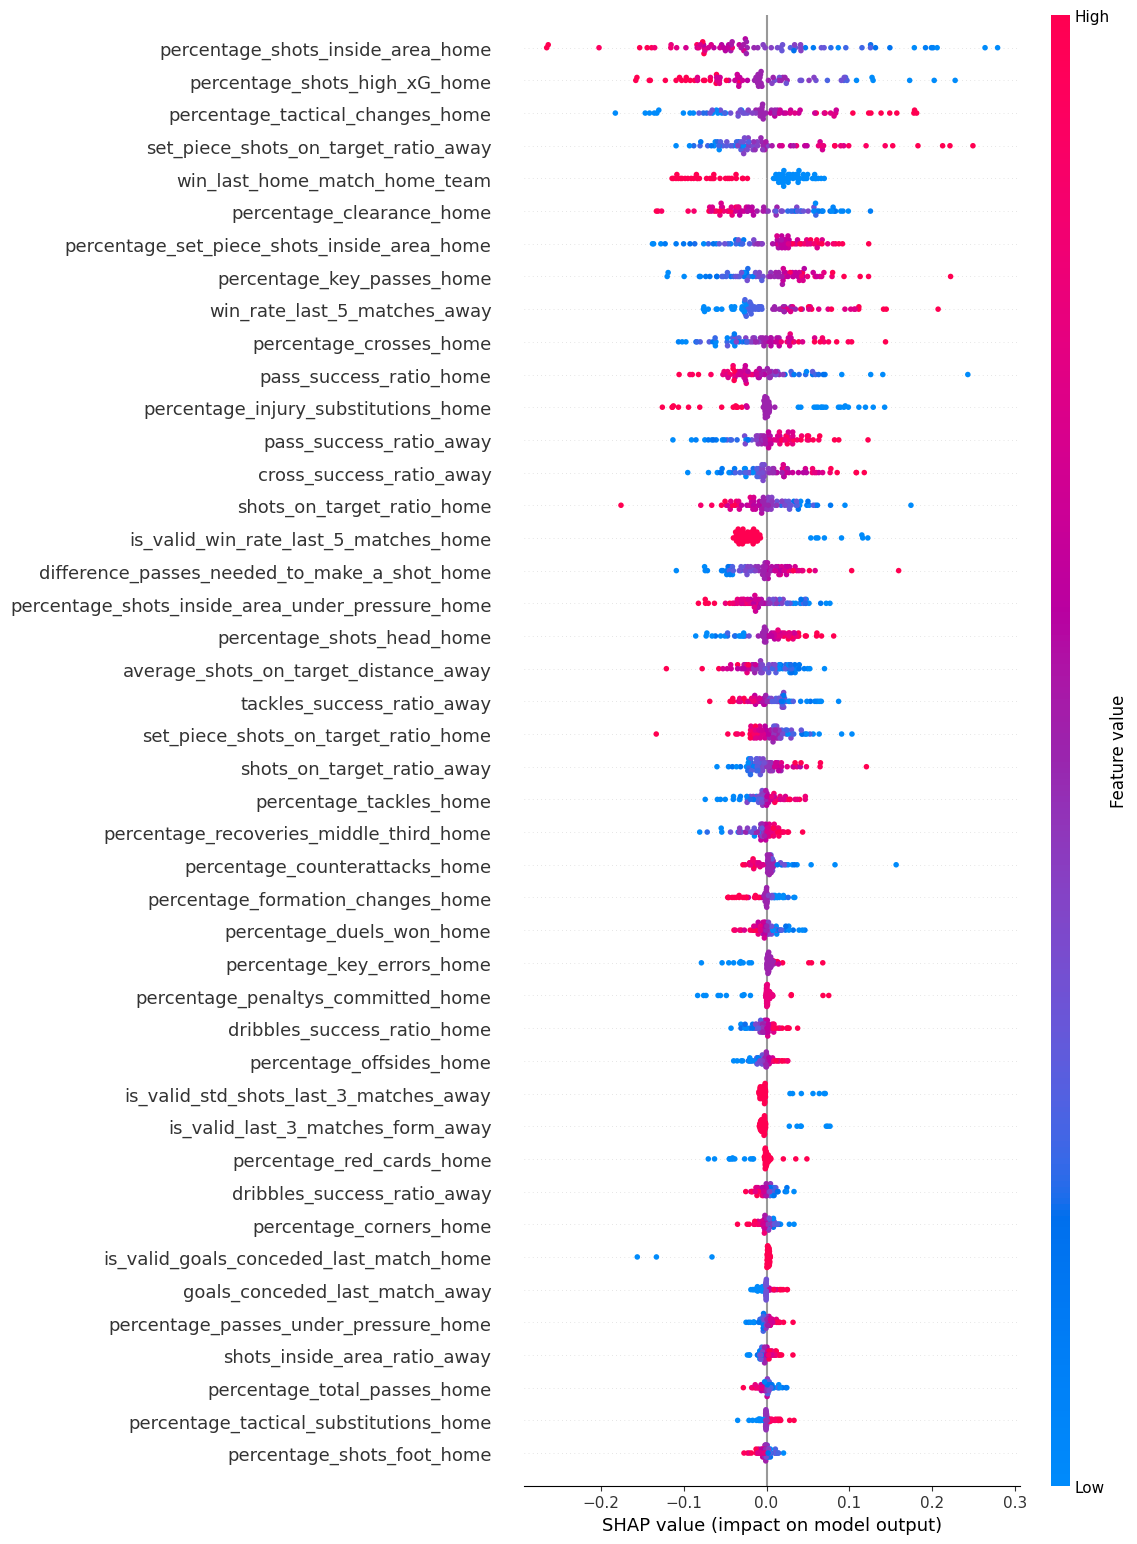

Class 1: draw
Important features (44):
['shots_on_target_ratio_home', 'shots_on_target_ratio_away', 'average_shots_on_target_distance_away', 'pass_success_ratio_home', 'pass_success_ratio_away', 'cross_success_ratio_away', 'tackles_success_ratio_away', 'dribbles_success_ratio_home', 'dribbles_success_ratio_away', 'set_piece_shots_on_target_ratio_home', 'set_piece_shots_on_target_ratio_away', 'last_3_matches_form_away', 'is_valid_last_3_matches_form_away', 'is_valid_win_rate_last_5_matches_home', 'win_rate_last_5_matches_away', 'win_last_home_match_home_team', 'is_valid_std_shots_last_3_matches_away', 'percentage_shots_high_xG_home', 'percentage_shots_inside_area_home', 'percentage_shots_foot_home', 'percentage_shots_head_home', 'percentage_total_passes_home', 'percentage_key_passes_home', 'difference_passes_needed_to_make_a_shot_home', 'percentage_crosses_home', 'percentage_corners_home', 'percentage_duels_won_home', 'percentage_tackles_home', 'percentage_clearance_home', 'percentage_p

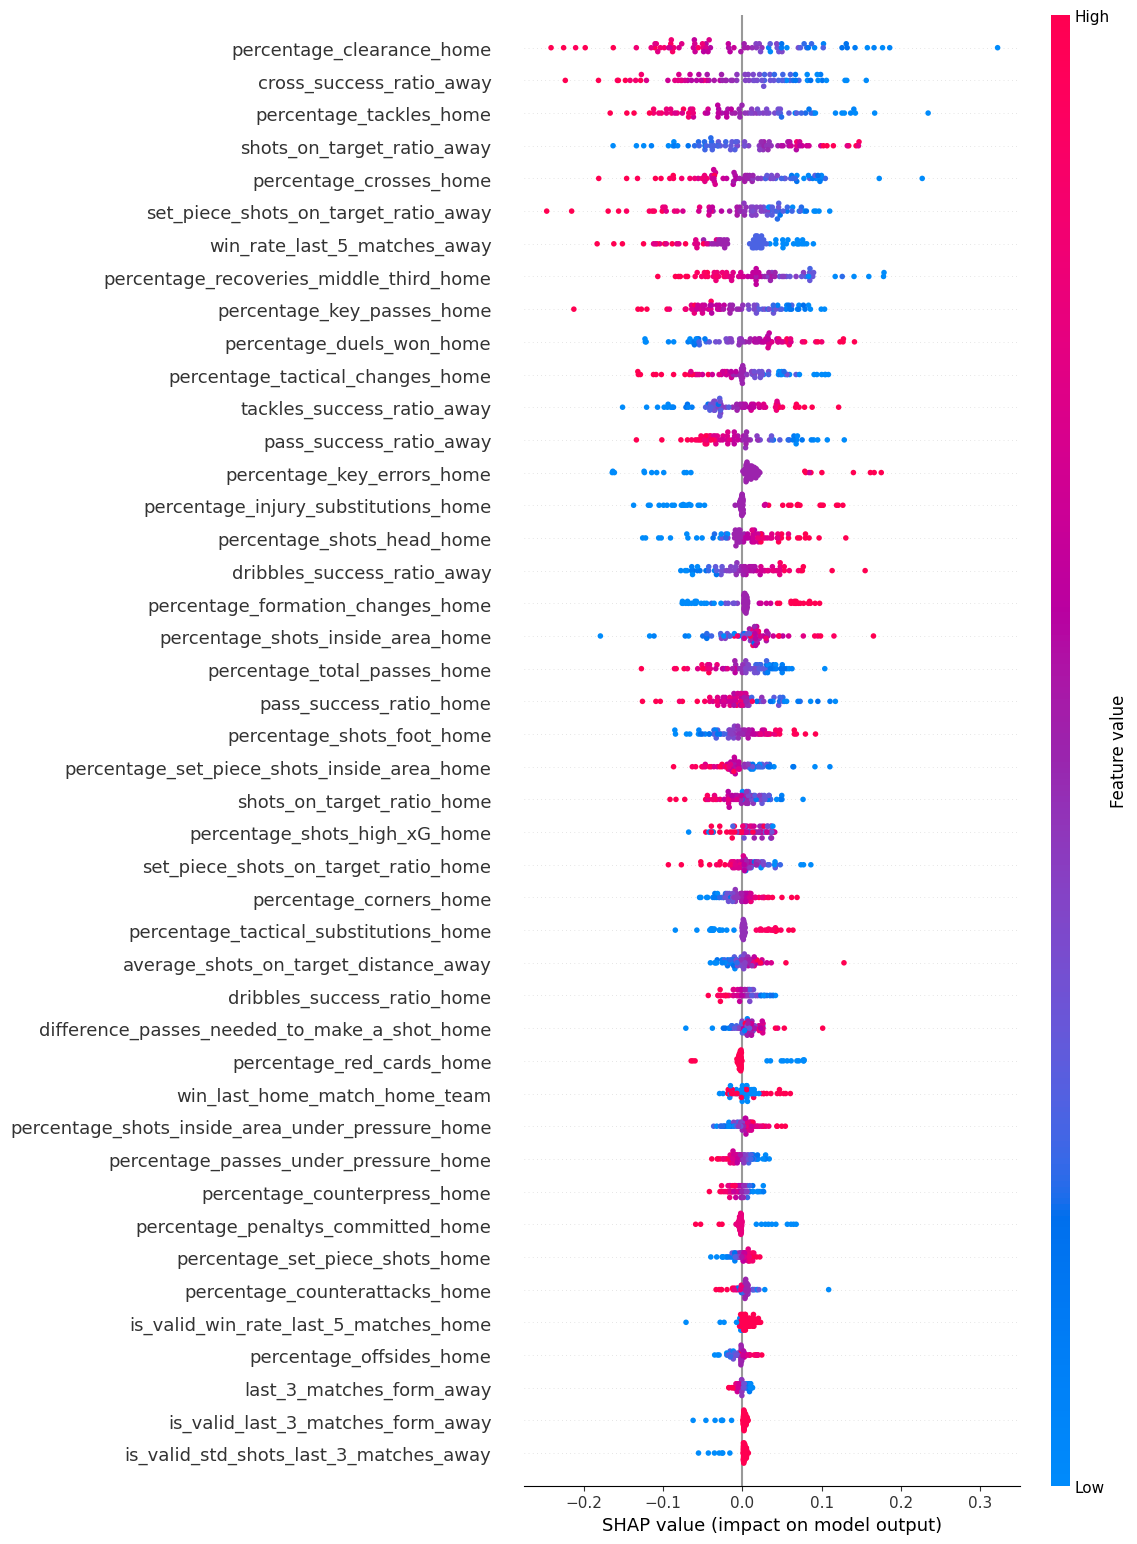

Class 2: home_team
Important features (43):
['shots_on_target_ratio_home', 'shots_on_target_ratio_away', 'average_shots_on_target_distance_away', 'pass_success_ratio_home', 'pass_success_ratio_away', 'cross_success_ratio_away', 'tackles_success_ratio_away', 'dribbles_success_ratio_home', 'dribbles_success_ratio_away', 'set_piece_shots_on_target_ratio_home', 'set_piece_shots_on_target_ratio_away', 'is_valid_win_rate_last_5_matches_home', 'win_rate_last_5_matches_away', 'win_last_home_match_home_team', 'is_valid_goals_conceded_last_match_home', 'goals_conceded_last_match_away', 'percentage_shots_high_xG_home', 'percentage_shots_inside_area_home', 'percentage_shots_foot_home', 'percentage_shots_head_home', 'percentage_total_passes_home', 'percentage_key_passes_home', 'difference_passes_needed_to_make_a_shot_home', 'percentage_crosses_home', 'percentage_corners_home', 'percentage_duels_won_home', 'percentage_tackles_home', 'percentage_clearance_home', 'percentage_key_errors_home', 'percent

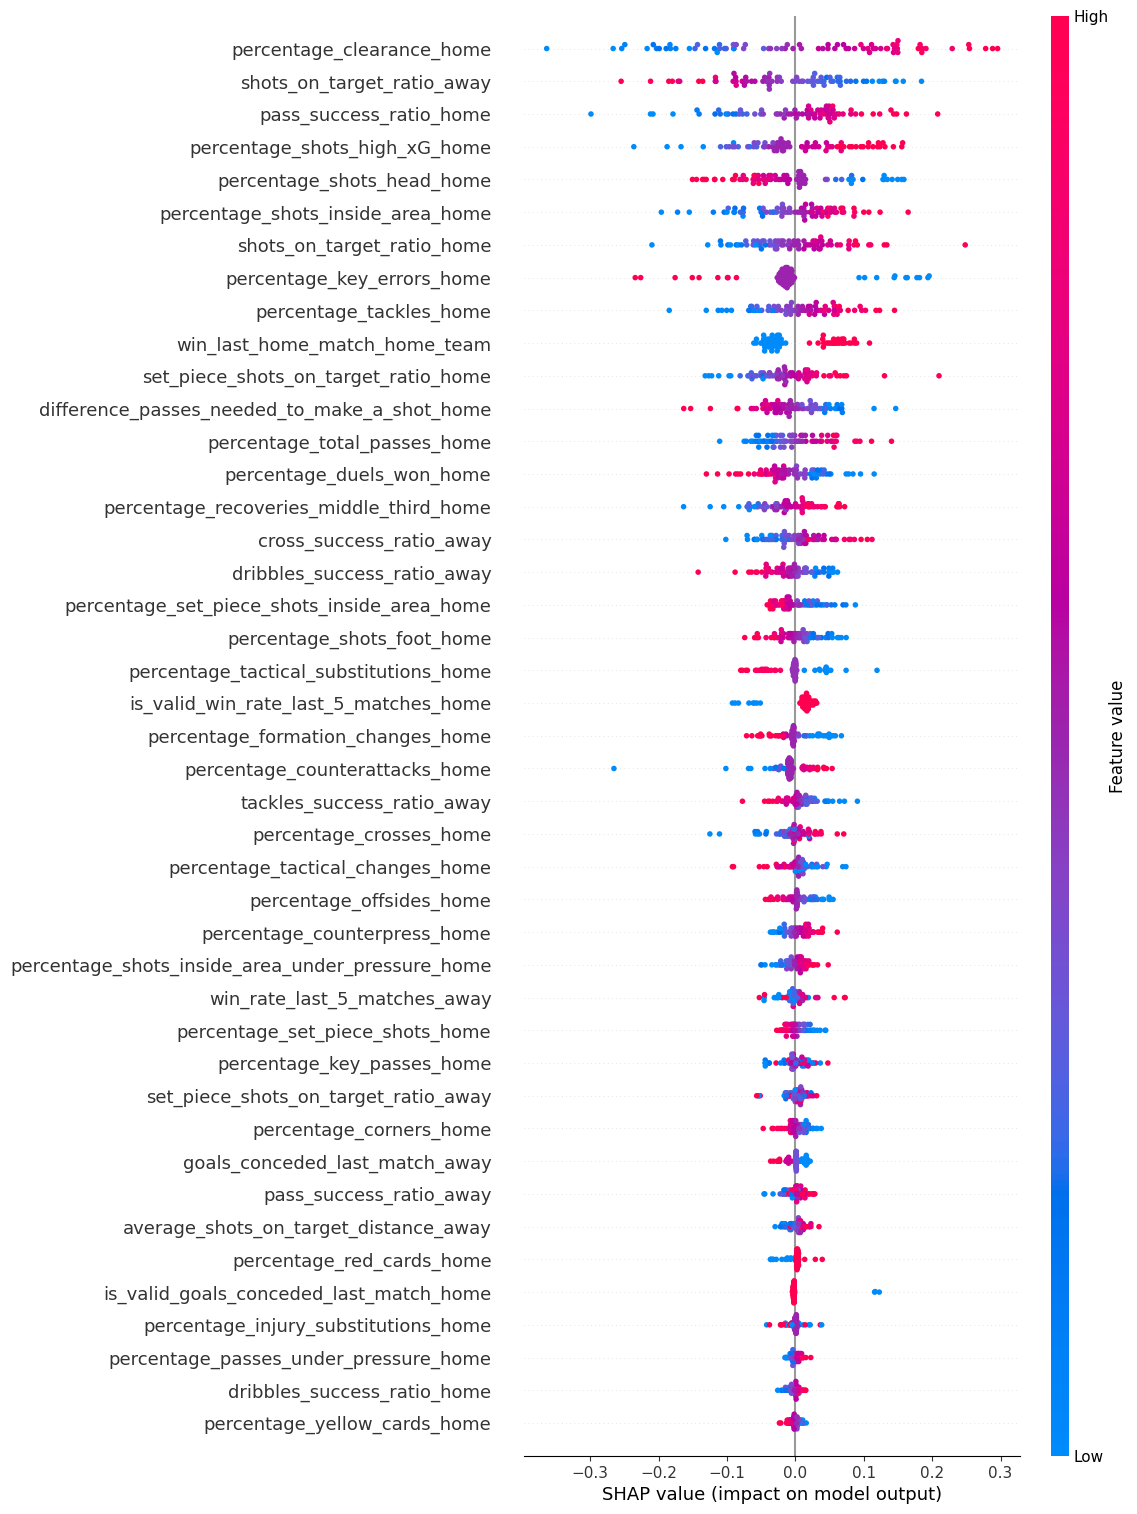

In [6]:
from src.analysis import plot_shap_summary

plot_shap_summary(shap_values_SerieA, feature_names_reduced_SerieA, encoder_SerieA)

Vamos a analizar cada uno de los gráficos:

- **Victoria del equipo visitante**: Este gráfico muestra las características que favorecen o disminuyen la probabilidad de victoria del equipo visitante en la Serie A.
    - **Características que favorecen la victoria del equipo visitante**: 📈
        - `percentage_tactical_changes_home`: Un equipo local que necesita hacer muchos cambios tácticos puede estar teniendo dificultades en el partido, lo que favorece al equipo visitante.
        - `set_piece_shots_on_target_ratio_away`: Si el equipo visitante tiene precisión en jugadas a balón parado, aumenta sus probabilidades de anotar y ganar el partido.
        - `win_rate_last_5_matches_away`: Si el equipo visitante ha tenido una buena racha de resultados en sus últimos cinco partidos, es más probable que mantenga el impulso y logre una victoria fuera de casa.
        - `percentage_crosses_home`: Un alto número de centros del equipo local respecto al total del partido (ambos equipos) sugiere una dependencia del juego aéreo, lo que puede ser más predecible y menos efectivo contra una defensa bien organizada.
        - `pass_success_ratio_away`: Un alto porcentaje de precisión en los pases del equipo visitante le permite mantener la posesión y controlar el ritmo del partido.
        - `cross_success_ratio_away`: Si el equipo visitante tiene una buena precisión en sus centros, puede generar más peligro ofensivo, especialmente en jugadas aéreas.
        - `difference_passes_needed_to_make_a_shot_home`: Si el equipo local necesita más pases para generar un disparo, su ataque es menos directo y puede ser menos eficiente.
        - `percentage_shots_head_home`: Un alto porcentaje de tiros de cabeza del equipo local puede indicar que su ataque depende excesivamente de centros y juego aéreo, lo que puede ser más predecible y menos efectivo.
        - `shots_on_target_ratio_away`: Un equipo visitante que tiene un alto porcentaje de tiros a puerta es más eficiente en ataque, aumentando sus probabilidades de marcar y ganar el partido.
        - `percentage_key_errors_home`: Si el equipo local comete errores clave, el equipo visitante puede aprovecharlos para generar ocasiones de gol.
        - `percentage_penaltys_committed_home`: Si el equipo local comete más penaltis, otorga oportunidades claras al equipo visitante para marcar.
        - `percentage_red_cards_home`: Un equipo local que recibe más tarjetas rojas pierde jugadores y se debilita, favoreciendo al equipo visitante.
    - **Características que no favorecen la victoria del equipo visitante**: 📉
        - `percentage_shots_inside_area_home`: Un equipo local que dispara mucho desde dentro del área genera más peligro, lo que puede complicar la victoria visitante.
        - `percentage_shots_high_xG_home`: Un equipo local que genera disparos con alta expectativa de gol (xG) es más probable que convierta sus oportunidades en goles, lo que dificulta la victoria del visitante.
        - `win_last_home_match_home_team`: Si el equipo local ganó su último partido en casa, podría llegar con confianza y hacer más difícil la victoria del visitante.
        - `percentage_clearance_home`: Si el equipo local despeja bien los balones en defensa, puede neutralizar los ataques del equipo visitante.
        - `pass_success_ratio_home`: Un equipo local con un alto porcentaje de precisión en pases puede mantener la posesión y dificultar el juego del equipo visitante.
        - `shots_on_target_ratio_home`: Si el equipo local tiene un alto porcentaje de tiros a puerta, está generando peligro y reduciendo las posibilidades de que el equipo visitante gane.
        - `percentage_shots_inside_area_under_pressure_home`: Si el equipo local logra finalizar jugadas incluso bajo presión defensiva, tiene más probabilidades de marcar y ganar el partido.
        - `average_shots_on_target_distance_away`: Si el equipo visitante realiza tiros a puerta desde largas distancias, sus oportunidades de marcar disminuyen, ya que estos disparos suelen ser menos peligrosos.
        - `percentage_duels_won_home`: Un equipo local que gana más duelos puede controlar mejor el partido y reducir la efectividad del equipo visitante.
        - `percentage_formation_changes_home`: Si el equipo local realiza cambios tácticos en la formación, puede ajustar su estrategia y contrarrestar al equipo visitante.
    - **Conclusión**: Para que un equipo visitante logre la victoria en la Serie A, necesita ser eficiente en ataque, generar tiros a puerta de calidad y aprovechar las debilidades del equipo local. Tener éxito en jugadas a balón parado y centros puede marcar la diferencia. Además, un equipo visitante con una buena racha de partidos recientes tiene más posibilidades de imponerse. Por otro lado, si el equipo local genera muchas oportunidades de alta calidad, tiene éxito en la precisión de pases y gana más duelos, la victoria visitante se vuelve más difícil. También influyen factores como la disciplina del equipo local (tarjetas rojas y penaltis) y su capacidad para ajustar tácticamente el partido.

- **Empate**: Este gráfico muestra las características que favorecen o disminuyen la probabilidad de empate en un partido en la Serie A. El empate en un partido se ve influenciado por el equilibrio entre ambos equipos en aspectos ofensivos, defensivos y de control del juego.
    - **Características que favorecen el empate**: 📈
        - `shots_on_target_ratio_away`: Un equipo visitante que tiene una gran efectividad en sus tiros a puerta aumenta sus posibilidades de anotar, aumentando las opciones de empate si el equipo local es superior en el juego.
        - `percentage_duels_won_home`: Si el equipo local gana muchos duelos, el partido se vuelve más disputado y menos fluido, lo que puede impedir que uno de los equipos se imponga con claridad.
        - `tackles_success_ratio_away`: Si el equipo visitante tiene un alto ratio del tackles hace que el partido se más disputado y menos fluido aumentando las posibilidades de empate.
        - `percentage_key_errors_home`: Si el equipo local comete varios errores esto puede hacer que el equipo visitante los aproveche y de esta manera pueda igualar el partido si el equipo local estaba por delante en el marcador.
        - `percentage_injuries_substitutions_home`: Si el equipo local tiene que hacer varios cambios por lesión en comparación al visitante, si se veía por debajo en el marcador esto puede hacer que cambies sus planes de juego y dar opciones al equipo visitante a empatar el partido.
        - `percentage_shots_head_home`: Un alto porcentaje de tiros de cabeza del equipo local puede indicar que su ataque depende excesivamente de centros y juego aéreo, lo que puede ser más predecible y menos efectivo, aumentando de esta manera la probabilidad de empate.
        - `dribbles_success_ratio_away`: Si el equipo visitante tiene una alta tasa de éxito en regates, le costará menos generar peligro en el área rival, lo que favorece el empate.
        - `percentage_formation_changes_home`: Un equipo local que realiza cambios de formación puede estar buscando equilibrio en el partido en lugar de volcarse totalmente al ataque, lo que favorece un marcador cerrado.
        - `percentage_shots_inside_area_home`: Un equipo local que tiene tiros dentro del área sin marcar indica dificultades para finalizar sus oportunidades, lo que favorece un resultado sin un ganador claro.
        - `percentage_tactical_substitutions_home`: Un equipo local que ajusta su táctica constantemente puede estar buscando mantener el equilibrio en el partido sin asumir demasiados riesgos.
        - `win_last_home_match_home_team`: Si el equipo local ganó su último partido en casa, puede mantener un nivel estable sin necesidad de arriesgar en exceso, favoreciendo el empate.
    - **Características que no favorecen el empate**: 📉
        - `percentage_clearance_home`: Si el equipo local consigue hacer varios despejes más que el equipo visitante puede indicar que el equipo local se esta defendiendo mejor y que puede ganar el partido.
        - `cross_success_ratio_away`: Si el equipo visitante tiene una buena precisión en sus centros, puede generar más peligro ofensivo, especialmente en jugadas aéreas; disminuyendo de esta manera las opciones de ganar del equipo local.
        - `percentage_tackles_home`: Un equipo local que hace más tackles que el equipo visitante puede indicar que esta frenando el ataque del equipo visitante mediante entradas, disminuyendo así las opciones de que se de un empate en el partido.
        - `percentage_crosses_home`: Un alto número de centros del equipo local respecto al total del partido (ambos equipos) sugiere una dependencia del juego aéreo, lo que puede ser más predecible y menos efectivo contra una defensa bien organizada.
        - `win_rate_last_5_matches_away`: Si el equipo visitante ha tenido una buena racha de resultados en sus últimos cinco partidos, es más probable que mantenga el impulso y logre una victoria fuera de casa.
        - `percentage_recoveries_middle_third_home`: Si equipo local consigue hacer más recuperaciones que el equipo visitante en el centro del campo, puede significar que no esta dejando tener el control del juego al equipo visitante y aumentando así sus posibilidades de ganar.
        - `percentage_key_passes_home`: Un alto porcentaje de pases clave en el equipo local puede indicar que generan oportunidades, pero si no se concretan, podría reflejar inefectividad ofensiva.
        - `percentage_tactical_changes_home`: Un mayor número de cambios tácticos del equipo local sugiere inestabilidad en su planteamiento inicial, lo que favorece al visitante.
        - `pass_success_ratio_away`: Un alto porcentaje de precisión en los pases del equipo visitante le permite mantener la posesión y controlar el ritmo del partido.
        - `shots_on_target_ratio_home`: Un equipo local con un alto porcentaje de tiros a puerta aumenta sus posibilidades de marcar, reduciendo la probabilidad de empate.
        - `set_piece_shots_on_target_ratio_home`: Un equipo local con precisión en jugadas a balón parado tiene más probabilidades de marcar y romper la igualdad.
        - `dribbles_success_ratio_home`: Un equipo local con una tasa alta de éxito en regates genera más peligro y tiene más opciones de ganar el partido.
        - `percentage_counterattacks_home`: Si el equipo local genera muchos contraataques efectivos, puede aprovechar los espacios y ganar el partido en lugar de mantener el empate.
        - `percentage_red_cards_home`: Un equipo local que recibe tarjetas rojas reduce su nivel competitivo y aumenta la posibilidad de que el equipo visitante gane.
        - `percentage_penaltys_committed_home`: Si el equipo local concede penaltis, otorga oportunidades claras al equipo visitante para marcar y ganar el partido.
        - `percentage_passes_under_pressure_home`: Un equipo local que mantiene la posesión incluso bajo presión puede controlar el partido y aumentar sus posibilidades de victoria.
    - **Conclusión**: El empate en un partido de la Serie A se produce cuando ambos equipos logran equilibrar sus fortalezas ofensivas y defensivas, evitando que uno de ellos tome una ventaja decisiva. Factores como una distribución equitativa de los tiros a puerta, la solidez defensiva del equipo local y la efectividad del equipo visitante en situaciones de presión favorecen un resultado igualado.
    El dominio de los duelos y una alta tasa de éxito en los tackles por parte de ambos equipos pueden hacer que el partido sea más disputado y menos fluido, reduciendo las oportunidades de que alguno de los dos logre imponerse con claridad. Asimismo, si el equipo local realiza cambios tácticos para mantener el equilibrio en el partido, sin asumir demasiados riesgos ofensivos, la probabilidad de un empate aumenta.
    Sin embargo, el empate se vuelve menos probable cuando uno de los equipos demuestra mayor precisión en jugadas a balón parado, una mejor capacidad para generar ataques efectivos o un mayor éxito en regates. Un equipo local con un alto porcentaje de tiros a puerta y pases clave tiene más opciones de ganar el partido, mientras que un equipo visitante en buena forma reciente es más propenso a aprovechar cualquier debilidad del rival y romper la igualdad.

- **Victoria del equipo local**: Este gráfico muestra las características que favorecen o disminuyen la probabilidad de victoria del equipo local en la Serie A.
    - **Características que favorecen la victoria del equipo local**: 📈
        - `percentage_clearance_home`: Si el equipo local consigue hacer varios despejes más que el equipo visitante puede indicar que el equipo local es más oslido defensivamente aumentando así sus opciones de ganar el partido.
        - `pass_success_ratio_home`: Un equipo local con una alta precisión en los pases puede controlar mejor el partido y construir ataques más efectivos.
        - `shots_on_target_ratio_home`: Un equipo local con un alto porcentaje de tiros a puerta genera más peligro y aumenta sus posibilidades de marcar y ganar el partido.
        - `percentage_shots_high_xG_home`: Si los tiros del equipo local tienen un alto expected goals (xG), son más peligrosos y pueden traducirse en goles con mayor frecuencia.
        - `percentage_shots_inside_area_home`: Un equipo local que genera muchos tiros dentro del área tiene más probabilidades de marcar, ya que estos disparos suelen ser más efectivos.
        - `percentage_tackles_home`: Un equipo local que hace más tackles que el equipo visitante puede indicar que esta frenando el ataque del equipo visitante mediante entradas, aumentando así sus opciones de ganar el partido.
        - `win_last_home_match_home_team`: Un equipo que ganó su último partido en casa puede estar en un buen estado de confianza, lo que favorece su rendimiento en este partido.
        - `set_piece_shots_on_target_ratio_home`: Si el equipo local tiene una alta efectividad en tiros a puerta desde jugadas a balón parado, incrementa sus opciones de victoria.
        - `percentage_recoveries_middle_third_home`: Si equipo local consigue hacer más recuperaciones que el equipo visitante en el centro del campo, puede significar que no esta dejando tener el control del juego al equipo visitante y aumentando así sus posibilidades de ganar.
        - `percentage_counterattacks_home`: Un equipo local que genera más contraataques puede aprovechar los espacios dejados por el rival y aumentar sus posibilidades de marcar. 
    - **Características que no favorecen la victoria del equipo local**: 📉
        - `shots_on_target_ratio_away`: Si el equipo visitante tiene un alto porcentaje de tiros a puerta, puede generar más peligro y reducir las opciones de victoria del equipo local.
        - `percentage_shots_head_home`: Un alto porcentaje de tiros de cabeza del equipo local puede indicar que su ataque depende excesivamente del juego aéreo, lo que podría ser menos efectivo.
        - `percentage_key_errors_home`: Si el equipo local comete errores clave, el equipo visitante puede aprovecharlos para generar ocasiones de gol y complicar la victoria local.
        - `difference_passes_needed_to_make_a_shot_home`: Si el equipo local necesita más pases para generar un disparo, su ataque es menos eficiente y más predecible.
        - `percentage_duels_won_home`: Ganar más duelos en el partido por parte del equipo local puede hacer que el partido sea más igualado y tienda al empate.
        - `dribbles_success_ratio_away`: Un equipo visitante con una alta tasa de éxito en regates puede romper la defensa del equipo local y generar más ocasiones de gol.
        - `percentage_tactical_substitutions_home`, `percentage_formation_changes_home`, `percentages_tactical_changes_home`: Si el equipo local hace muchos cambios/sustituciones tácticos puede deberse a que se están viendo sobrepasados en el marcador por el equipo contrario siendo más complicado que se lleven el partido.
        - `tackles_success_ratio_away`: Un equipo visitante con éxito en sus entradas defensivas puede recuperar el balón con eficacia y frustrar los ataques del equipo local.
    - **Conclusión**: La victoria del equipo local en la Serie A se ve impulsada por su capacidad para generar peligro en el área rival, mantener la solidez defensiva y controlar el ritmo del partido. Un equipo local que es preciso en sus pases, realiza despejes efectivos y tiene una alta efectividad en tiros a puerta dentro del área tiene más probabilidades de ganar. Además, su éxito en jugadas a balón parado y contraataques puede marcar la diferencia a su favor.
    Sin embargo, la victoria local se complica si el equipo visitante tiene una alta efectividad en sus tiros a puerta, es exitoso en regates y consigue frustrar los ataques locales con una defensa organizada. Errores clave del equipo local, un exceso de dependencia del juego aéreo y la necesidad de realizar muchas modificaciones tácticas pueden ser señales de debilidad que el equipo visitante podría aprovechar.

- **Conclusiones generales**:
    - *Victoria del equipo visitante*: Para que un equipo visitante logre la victoria en la Serie A, es fundamental su eficiencia ofensiva y la capacidad de explotar las debilidades del equipo local. Factores como un alto porcentaje de tiros a puerta, una buena precisión en centros, y el aprovechamiento de jugadas a balón parado juegan un papel crucial en su éxito. Además, si el equipo visitante tiene una buena racha de resultados recientes, su confianza y estado de forma pueden ser determinantes.
    Por otro lado, la victoria visitante se complica si el equipo local logra generar muchos tiros dentro del área con alta expectativa de gol (xG), mantiene una buena precisión en pases, y consigue neutralizar los ataques visitantes con despejes efectivos y solidez defensiva. Además, si el equipo local controla el ritmo del partido y realiza ajustes tácticos efectivos, puede reducir significativamente las posibilidades de victoria del equipo visitante.
    - *Empate*: El empate suele ocurrir cuando ningún equipo logra imponerse de manera clara, ya sea porque ambos muestran un buen equilibrio entre ataque y defensa, o porque el partido se vuelve disputado y trabado. Factores como una alta cantidad de duelos ganados, una gran efectividad en tackles, y la capacidad del equipo visitante para generar peligro sin imponerse completamente favorecen un resultado igualado.
    Sin embargo, el empate se vuelve menos probable cuando uno de los equipos domina en jugadas a balón parado, tiene éxito en regates o genera un alto número de tiros efectivos. Un equipo local con una alta precisión en pases clave y una buena organización táctica tiene más opciones de romper la igualdad. Además, si el equipo visitante llega con una racha positiva y mantiene un alto porcentaje de posesión, la posibilidad de que se lleve la victoria aumenta.
    - *Victoria del equipo local*: La victoria del equipo local se ve impulsada por su capacidad para generar peligro en el área rival, mantener la solidez defensiva y controlar el ritmo del partido. Un equipo local con una alta precisión en los pases, eficiencia en tiros a puerta y éxito en despejes defensivos tiene más probabilidades de imponerse. Además, la capacidad de realizar contraataques efectivos y aprovechar las jugadas a balón parado puede marcar la diferencia en su favor.
    No obstante, la victoria local se ve amenazada si el equipo visitante muestra una alta efectividad en sus tiros, rompe líneas defensivas con éxito en regates, y consigue desorganizar la defensa local mediante centros precisos y jugadas elaboradas. Errores clave del equipo local, un exceso de dependencia del juego aéreo y la necesidad de hacer múltiples ajustes tácticos pueden ser señales de inestabilidad que favorecen al equipo visitante.
    - *Factores no determinantes*: Algunos factores parecen tener un impacto limitado en la definición del resultado. Aspectos como la cantidad de tarjetas amarillas, ciertos cambios tácticos específicos y la presión defensiva en la zona de pases no parecen influir significativamente en la victoria de un equipo o en la probabilidad de empate. Además, si bien la forma reciente de los equipos puede ser un indicador relevante, no siempre es determinante en el desarrollo del partido, ya que otros factores contextuales pueden influir en el rendimiento de cada equipo.